<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from numpy import linalg as LA

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')

In [5]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
...,...,...,...,...,...
4995,0,28,35700,2,0
4996,0,34,52400,1,0
4997,0,20,33900,2,0
4998,1,22,32700,3,0


In [6]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [7]:
data.columns

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

In [8]:
def unique_data(data,name):
    print(name,':',data[name].unique())

In [9]:
unique_data(data, 'Пол')
unique_data(data, 'Возраст')
unique_data(data, 'Члены семьи')
unique_data(data, 'Страховые выплаты')

Пол : [1 0]
Возраст : [41 46 29 21 28 43 39 25 36 32 38 23 40 34 26 42 27 33 47 30 19 31 22 20
 24 18 37 48 45 44 52 49 35 56 65 55 57 54 50 53 51 58 59 60 61 62]
Члены семьи : [1 0 2 4 3 5 6]
Страховые выплаты : [0 1 2 3 5 4]


In [10]:
def drive_hist(data,name):
    data.hist(name, grid=True, figsize = (10,5))

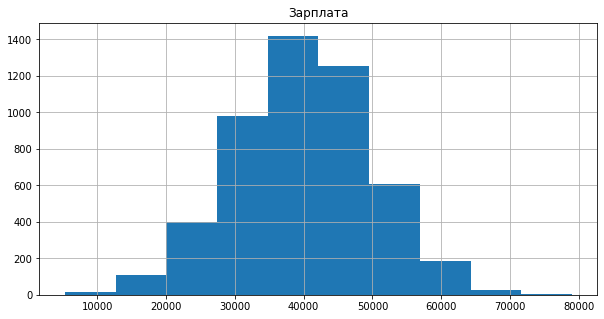

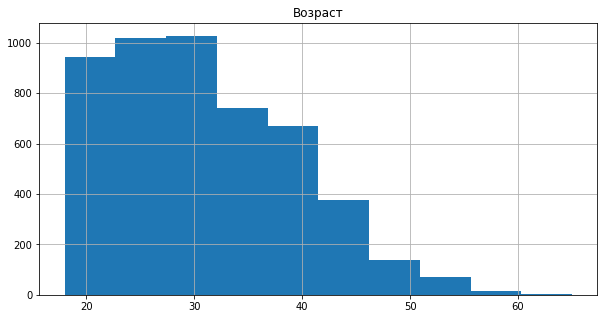

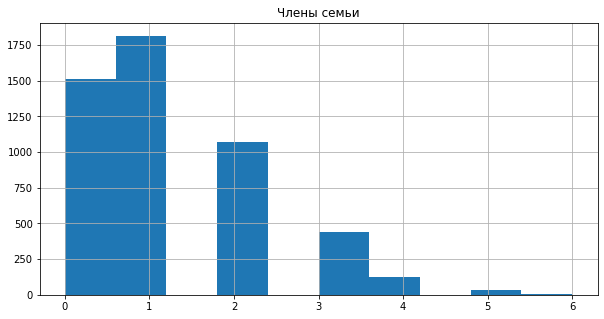

In [11]:
drive_hist(data, 'Зарплата')
drive_hist(data, 'Возраст')
drive_hist(data, 'Члены семьи')

In [12]:
features = data.drop("Страховые выплаты", axis=1)
target = data["Страховые выплаты"]

class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550308169177


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Результат не изменится

**Обоснование:**
Упростим формулу обучения, раскроем скобки
$
w = (X^T X)^{-1} X^T y = X^{-1}(X^T)^{-1}X^Ty = X^{-1}y
$

Подставим в формулу предсказания
$
a=XX^{-1}y
$

Добавим обратимую матрицу
$
w1 = ((XA)^T(XA))^{-1}(XA)^Ty
$

Подставим в формулу предсказания и раскроем скобки

$
а1 = X_{1}((XA)^TXA)^{-1}(XA)^Ty = X_{1}(A^T X^T XA)^{-1}A^TX^Ty = X_{1}A^{-1}A(X^TX)^{-1}EX^Ty = X_{1}E(X^TX)^{-1}EX^Ty= X_{1}(X^TX)^{-1}X^Ty
$

## Алгоритм преобразования

**Алгоритм**



Для защиты данных я выбрала умножать матрицу признаков на обратимую матрицу, исходя из формул и доказательства выше. Обратимая матрица должна быть размерностью соответсвующая количеству признаков в нашем датасете (4х4)

## Проверка алгоритма

In [13]:
#создам матрицу 4х4
inv_matrix = np.random.rand(4,4)
#проверю на обратимость
np.linalg.inv(inv_matrix)

array([[-3.20945977,  2.7224502 ,  1.1714817 ,  1.3520188 ],
       [-5.60219836,  5.70707867, -1.00288556,  3.66764128],
       [ 1.38471533,  0.45565777, -1.41434593, -1.10945644],
       [ 7.56596055, -8.04889236,  1.33987298, -3.21249606]])

In [14]:
features_inv = features @ inv_matrix

In [15]:
features_inv

,0,1,2,3
0,44817.520064,7272.484294,17051.206286,21275.799624
1,34347.439343,5576.490549,13075.300353,16306.159863
2,18984.330072,3082.546688,7228.806999,9012.555824
3,37667.700891,6109.769999,14323.224687,17881.077297
4,23588.981688,3829.022647,8978.384532,11198.488936
...,...,...,...,...
4995,32256.179253,5234.465574,12270.996921,15313.004328
4996,47339.039326,7678.924154,18004.774975,22471.715214
4997,30624.415400,4968.290880,11646.642626,14537.994879
4998,29543.560181,4795.000464,11237.811493,14026.142635


In [16]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
...,...,...,...,...
4995,0,28,35700,2
4996,0,34,52400,1
4997,0,20,33900,2
4998,1,22,32700,3


In [17]:
model = LinearRegression()
model.fit(features_inv, target)
predictions = model.predict(features_inv)
print(r2_score(target, predictions))

0.42494550305663503


Вывод: Качество до и после преобразования не отличается